# Assignment 2 - Swarm Intelligence

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits import mplot3d

## Seed

In [2]:
# np.random.seed(0)

## Exercise 2 - PSO

In [3]:
# Function to minimize
def f(x):
    return x**2

In [4]:
def pso(x, v, w, a1, a2, r1, r2):
    x_hat = 0 
    g_hat = 0

    x_all = [x]

    i = 0
    while(i < 100):
        v = w*v + a1*r1*(x_hat - x) + a2*r2*(g_hat - x)
        x = x+v

        if i == 0:
            x_hat = x
            g_hat = x
        else:
            x_hat = x if f(x) < f(x_hat) else x_hat
            g_hat = x if f(x) < f(g_hat) else g_hat

        i += 1
        x_all.append(x)
    
    return x_all

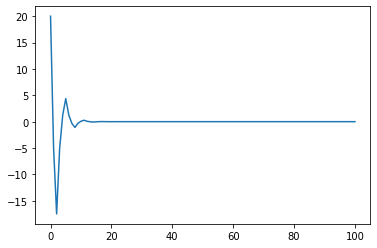

In [5]:
plt.figure()
plt.plot(pso(20, 10, 0.5, 1.5, 1.5, 0.5, 0.5))
plt.show()

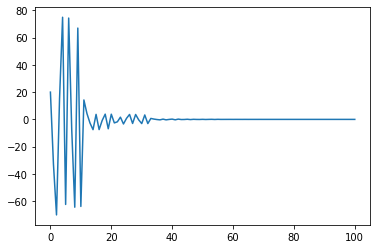

In [6]:
plt.figure()
plt.plot(pso(20, 10, 0.7, 1.5, 1.5, 1.0, 1.0))
plt.show()

## Exercise 3 - PSO

#### Helper Functions

In [7]:
def distance(z, m):
    return np.sqrt(np.sum((z - m)**2))

In [8]:
def fitness(D, C, Nc):
    score = 0
    
    for i in range(Nc):
        indices = np.where(C == i)[0]
        score += (np.sum(D[indices, i]) / np.max([len(indices), 1]))
    
    return score / Nc

In [9]:
def update(particle, velocity, gbest, lbest, w, a1, a2):
    r1, r2 = np.random.uniform(0, 1, (2, velocity.shape[1]))
    velocity = (w*velocity) + ((a1*r1)*(lbest - particle)) + ((a2*r2)*(gbest - particle))
    
    return velocity

#### Parameters

In [10]:
Nc = 2
Nd = 2
No = 400
Np = 10
iterations = 100

w = 0.72
a1 = 1.49
a2 = 1.49

#### Create Dataset

In [11]:
data = np.random.uniform(-1, 1, (No, Nd))

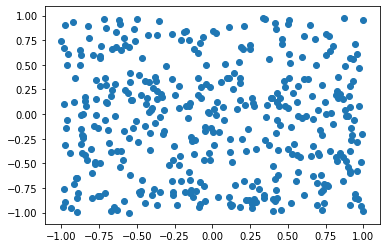

In [12]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#### Create Particles

In [13]:
particles = np.random.uniform(-1, 1, (Np, Nc, Nd))
print(particles.shape)

(10, 2, 2)


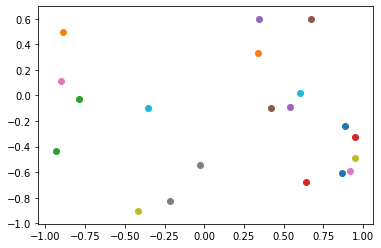

In [14]:
plt.figure()
for particle in particles:
    plt.scatter(particle[:,0], particle[:, 1])
plt.show()

#### PSO Algorithm

In [15]:
def PSO(particles, data, Np, Nc, Nd, No):
    velocities = np.zeros((Np, Nc, Nd))

    gbest_f = 0 
    gbest_x = np.zeros((Nc, Nd))
    gbest_c = np.zeros(No)

    lbest_f = np.zeros(Np)
    lbest_x = np.zeros((Np, Nc, Nd))

    for i in range(iterations):

        # Loop over all particles
        for j in range(Np):
            clusters = np.zeros(No)
            distances = np.zeros((No, Nc))

            # Loop over all data points
            for k in range(No):
                # Compute distances to all clusters
                distances[k] = [distance(data[k], m) for m in particles[j]]

                # Assign closest cluster
                clusters[k] = np.argmin(distances[k])
            
            # Compute fitness scores
            f = fitness(distances, clusters, Nc)

            # Update local best
            if(i == 0):
                lbest_f[j] = f
                lbest_x[j] = particles[j]
            else:
                if(f < lbest_f[j]):
                    lbest_f[j] = f
                    lbest_x[j] = particles[j]

        # Update global best
        if(i == 0):
            gbest_f = np.min(lbest_f)
            gbest_x = particles[np.argmin(lbest_f)]
        else:
            if(np.min(lbest_f) < gbest_f):
                gbest_f = np.min(lbest_f)
                gbest_x = particles[np.argmin(lbest_f)]

        # Update velocities 
        for j in range(Np):
            velocities[j] = update(particles[j], velocities[j], gbest_x, lbest_x[j], w, a1, a2)

        # Update particles
        particles += velocities
        
    return gbest_f, gbest_x

In [16]:
gbest_f, gbest_x = PSO(particles, data, Np, Nc, Nd, No)

In [17]:
clusters = np.zeros(No)
distances = np.zeros((No, Nc))

# Loop over all data points
for k in range(No):
    # Compute distances to all clusters
    distances[k] = [distance(data[k], m) for m in gbest_x]

    # Assign closest cluster
    clusters[k] = np.argmin(distances[k])

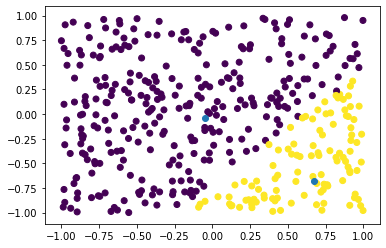

In [18]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(gbest_x[:,0], gbest_x[:,1])
plt.show()

In [19]:
print(gbest_f)

0.5627388458209446


#### Iris

In [20]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target

In [21]:
Nc = 3
Nd = 3
No = len(X)
Np = 10
iterations = 100

w = 0.72
a1 = 1.49
a2 = 1.49

In [22]:
particles = np.random.uniform(-1, 1, (Np, Nc, Nd))
print(particles.shape)

(10, 3, 3)


In [23]:
gbest_f, gbest_x = PSO(particles, X, Np, Nc, Nd, No)

In [24]:
clusters = np.zeros(No)
distances = np.zeros((No, Nc))

# Loop over all data points
for k in range(No):
    # Compute distances to all clusters
    distances[k] = [distance(X[k], m) for m in gbest_x]

    # Assign closest cluster
    clusters[k] = np.argmin(distances[k])

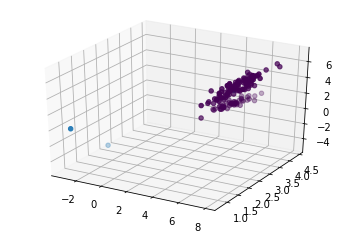

In [25]:
fig= plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = clusters)
ax.scatter(gbest_x[:,0], gbest_x[:,1], gbest_x[:,2])
plt.show()